In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sympy.tensor.array.expressions import convert_array_to_matrix

In [2]:
advertising=pd.read_csv('../../data/advertising.csv')
print(advertising.head())
print(advertising.describe())
print(advertising.shape)

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000
(200, 5)


### 数据预处理

In [3]:
#去掉第一列ID
advertising.drop(advertising.columns[0],axis=1,inplace=True)
#去掉空值
advertising.dropna(inplace=True)
#提取特征和标签（目标值）
X=advertising.drop("Sales",axis=1)
y=advertising["Sales"]

In [5]:
#计算皮尔森相关系数
print(X.corrwith(y,method='pearson'))

TV           0.782224
Radio        0.576223
Newspaper    0.228299
dtype: float64


In [10]:
corr_matrix=advertising.corr(method='pearson')
print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


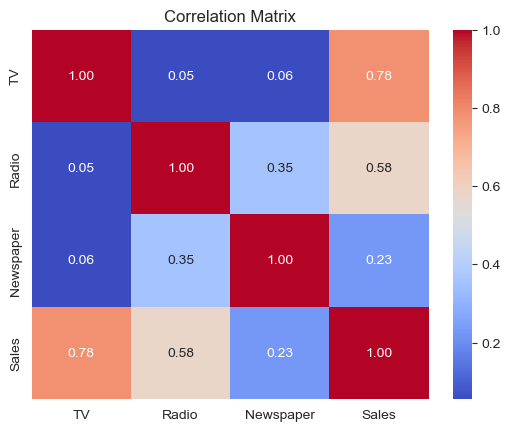

In [11]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()